In [1]:
# train verileri indirme.
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-11-17 16:01:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  52.9MB/s    in 2.7s    

2020-11-17 16:01:19 (52.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# test verileri indirme.
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-11-17 16:01:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-11-17 16:01:24 (81.4 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# veri indirme işlemimiz tamamlandı.

In [4]:
# indirdiğimiz zip dosyamızdan verilerimizin yollarını söylüyoruz.
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')


train_human_dir = os.path.join('/tmp/horse-or-human/humans')


validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [8]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-8.png', 'horse17-0.png', 'horse01-4.png', 'horse25-8.png', 'horse02-2.png', 'horse16-3.png', 'horse46-2.png', 'horse02-5.png', 'horse07-0.png', 'horse39-9.png']
['human16-06.png', 'human08-24.png', 'human04-29.png', 'human08-29.png', 'human12-17.png', 'human13-14.png', 'human14-25.png', 'human16-07.png', 'human12-01.png', 'human13-20.png']
['horse3-171.png', 'horse2-412.png', 'horse1-411.png', 'horse2-183.png', 'horse2-069.png', 'horse3-099.png', 'horse5-203.png', 'horse6-153.png', 'horse1-264.png', 'horse4-014.png']
['valhuman04-06.png', 'valhuman01-02.png', 'valhuman05-24.png', 'valhuman03-16.png', 'valhuman01-13.png', 'valhuman02-12.png', 'valhuman05-01.png', 'valhuman05-07.png', 'valhuman05-23.png', 'valhuman02-17.png']


In [5]:
# Elimizdeki toplam veri sayılarını görmek için bu kod bloklarını yazdık.
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 4 x 4 lük x ve y ekseni belirttik. Görsellerimiz için.
nrows = 4
ncols = 4

pic_index = 0

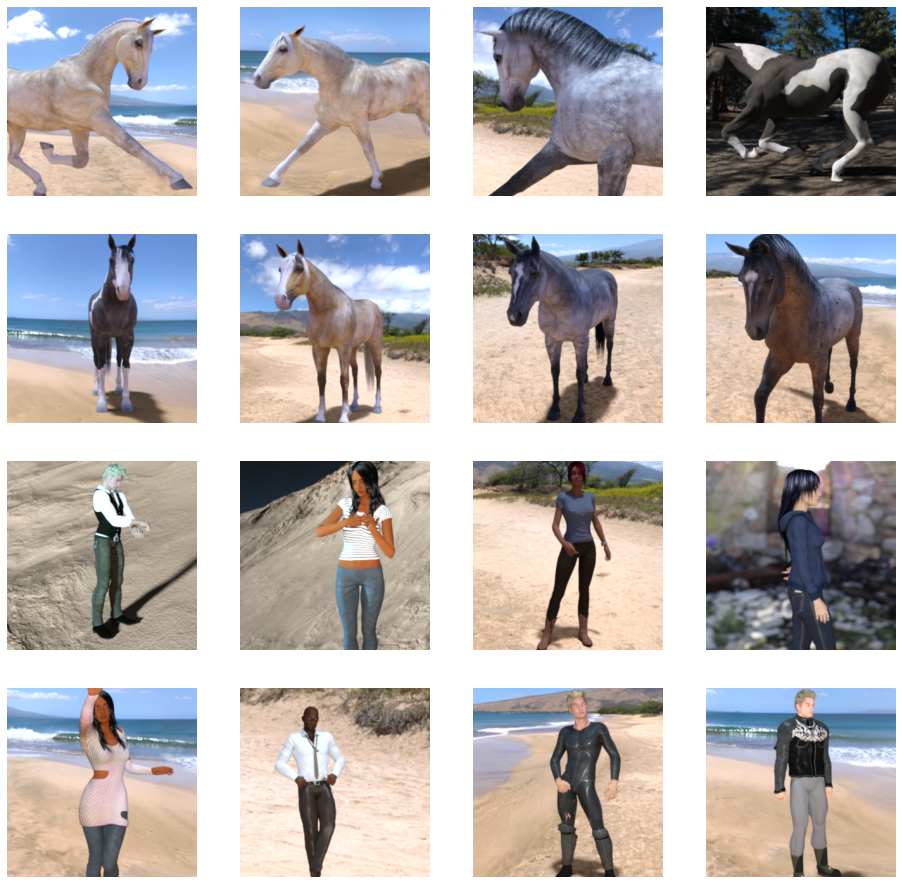

In [9]:
# Elimizde bulunan train verilerinin bir kısmını incelemek için görselleştirme yaptık.
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görüntülerimizi ölçeklendiriyoruz.
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory( '/tmp/horse-or-human/',target_size=(300, 300),batch_size=128,class_mode='binary')
# Sadece insan ve at üzerinde sınfılandırma yaptığımız için class_mode binary olarak tanımladık.


validation_generator = validation_datagen.flow_from_directory( '/tmp/validation-horse-or-human/', target_size=(300, 300),  batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [15]:
# modelimizi fit ediyoruz.
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1, validation_data = validation_generator, validation_steps=8)

Epoch 1/15
8/8 [==============================] - 70s 9s/step - loss: 0.8033 - accuracy: 0.5695 - val_loss: 1.0838 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 71s 9s/step - loss: 0.8743 - accuracy: 0.6796 - val_loss: 0.6380 - val_accuracy: 0.6992
Epoch 3/15
8/8 [==============================] - 72s 9s/step - loss: 0.6311 - accuracy: 0.8320 - val_loss: 0.4952 - val_accuracy: 0.7852
Epoch 4/15
8/8 [==============================] - 70s 9s/step - loss: 0.4655 - accuracy: 0.8231 - val_loss: 0.7067 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 70s 9s/step - loss: 0.2719 - accuracy: 0.8966 - val_loss: 1.4233 - val_accuracy: 0.7461
Epoch 6/15
8/8 [==============================] - 70s 9s/step - loss: 0.3061 - accuracy: 0.9032 - val_loss: 0.9845 - val_accuracy: 0.7773
Epoch 7/15
8/8 [==============================] - 70s 9s/step - loss: 0.1109 - accuracy: 0.9611 - val_loss: 1.5703 - val_accuracy: 0.8203
Epoch 8/15
8/8 [==================

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
 # tahmin edilmesini istediğimiz görselimizi yüklüyoruz.
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving indir (3).jpg to indir (3).jpg
[1.]
indir (3).jpg is a human


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


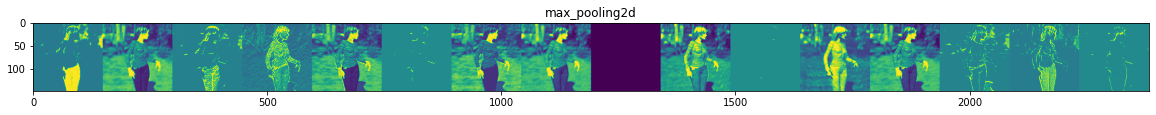

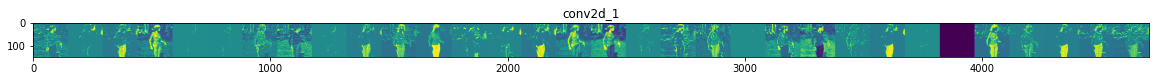

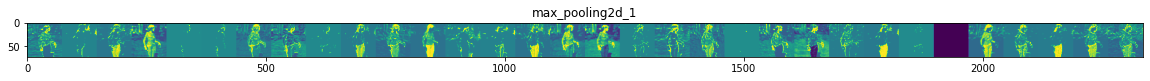

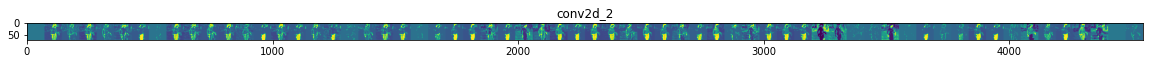

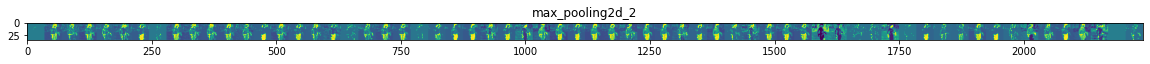

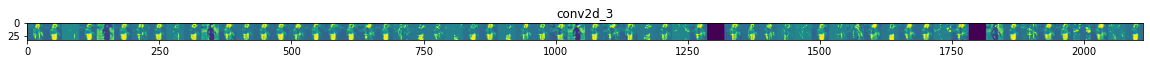

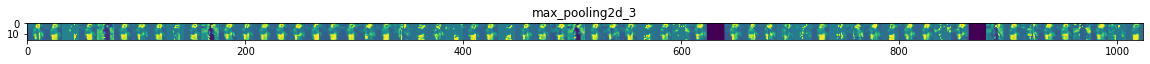

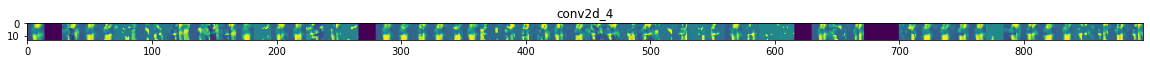

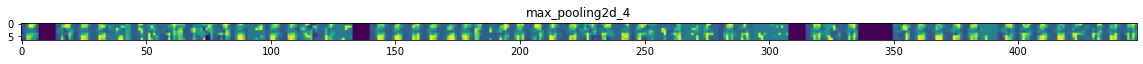

In [22]:
# Veri setimizdeki bazı verilin Conv ve MaxPooling uygulandıktan sonraki durumlarını inceliyoruz, görselleştiriyoruz.

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

# Görselimizi ölçeklendiriyoruz.
x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[1]
  
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):

      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')